In [9]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit


DATA_DIR = "data/datasets/"

summer = pd.read_csv(DATA_DIR+'summer_ais_test.csv', index_col=0, parse_dates = ['timestamp'])
winter = pd.read_csv(DATA_DIR+'winter_ais_test.csv', index_col=0, parse_dates = ['timestamp'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/eunkyu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
print('len summer =',len(summer))
print('len winter =',len(winter))

len summer = 18585914
len winter = 19646122


In [11]:
print('summer start  = ', summer.timestamp.min())
print('summer end    = ', summer.timestamp.max())
print('winter start  = ', winter.timestamp.min())
print('winter end    = ', winter.timestamp.max())

summer start  =  2020-07-01 00:00:00
summer end    =  2020-07-01 23:59:59
winter start  =  2019-12-01 00:00:00
winter end    =  2019-12-01 23:59:59


### Observation Specific Statistics

In [12]:
# Vessel type distribution
print('Summer vessel type distribution')
print(summer.vessel_type.dropna().value_counts(normalize=True) * 100)
print('\nWinter vessel type distribution')
print(winter.vessel_type.dropna().value_counts(normalize=True) * 100)

Summer vessel type distribution
0      26.098760
30     17.496024
70     14.323907
52     13.715914
80      7.408062
         ...    
122     0.000247
220     0.000247
124     0.000210
201     0.000038
206     0.000005
Name: vessel_type, Length: 121, dtype: float64

Winter vessel type distribution
0               26.007774
30              21.781556
52              12.940462
70              12.181524
80               6.291639
                  ...    
Wing In Grnd     0.000102
61               0.000046
126              0.000036
53               0.000010
42               0.000005
Name: vessel_type, Length: 138, dtype: float64


In [13]:
print('Summer AIS Mean speed:', summer.speed.mean())
print('Summer AIS Median speed:', summer.speed.median())
print('')
print('Winter AIS Mean speed:', winter.speed.mean())
print('Winter AIS Median speed:', winter.speed.median())

Summer AIS Mean speed: 4.292664498501385
Summer AIS Median speed: 0.6

Winter AIS Mean speed: 4.606739233320452
Winter AIS Median speed: 0.9


In [15]:
ais_types = summer.groupby('vessel_type')

print('Summer vessel speed by types')
for vessel_type, observations in ais_types:
    print(str(vessel_type) + ' Mean speed:', summer.speed.mean())
    print(str(vessel_type) + ' Median speed:', summer.speed.median())

Summer vessel speed by types
0 Mean speed: 4.292664498501385
0 Median speed: 0.6
1 Mean speed: 4.292664498501385
1 Median speed: 0.6
5 Mean speed: 4.292664498501385
5 Median speed: 0.6
7 Mean speed: 4.292664498501385
7 Median speed: 0.6
9 Mean speed: 4.292664498501385
9 Median speed: 0.6
10 Mean speed: 4.292664498501385
10 Median speed: 0.6
11 Mean speed: 4.292664498501385
11 Median speed: 0.6
12 Mean speed: 4.292664498501385
12 Median speed: 0.6
20 Mean speed: 4.292664498501385
20 Median speed: 0.6
23 Mean speed: 4.292664498501385
23 Median speed: 0.6
24 Mean speed: 4.292664498501385
24 Median speed: 0.6
25 Mean speed: 4.292664498501385
25 Median speed: 0.6
29 Mean speed: 4.292664498501385
29 Median speed: 0.6
30 Mean speed: 4.292664498501385
30 Median speed: 0.6
31 Mean speed: 4.292664498501385
31 Median speed: 0.6
32 Mean speed: 4.292664498501385
32 Median speed: 0.6
33 Mean speed: 4.292664498501385
33 Median speed: 0.6
34 Mean speed: 4.292664498501385
34 Median speed: 0.6
35 Mean s

In [16]:
ais_types = summer.groupby('vessel_type')
print('Winter vessel speed by types')

for vessel_type, observations in ais_types:
    print(str(vessel_type) + ' Mean speed:', winter.speed.mean())
    print(str(vessel_type) + ' Median speed:', winter.speed.median())

Winter vessel speed by types
0 Mean speed: 4.606739233320452
0 Median speed: 0.9
1 Mean speed: 4.606739233320452
1 Median speed: 0.9
5 Mean speed: 4.606739233320452
5 Median speed: 0.9
7 Mean speed: 4.606739233320452
7 Median speed: 0.9
9 Mean speed: 4.606739233320452
9 Median speed: 0.9
10 Mean speed: 4.606739233320452
10 Median speed: 0.9
11 Mean speed: 4.606739233320452
11 Median speed: 0.9
12 Mean speed: 4.606739233320452
12 Median speed: 0.9
20 Mean speed: 4.606739233320452
20 Median speed: 0.9
23 Mean speed: 4.606739233320452
23 Median speed: 0.9
24 Mean speed: 4.606739233320452
24 Median speed: 0.9
25 Mean speed: 4.606739233320452
25 Median speed: 0.9
29 Mean speed: 4.606739233320452
29 Median speed: 0.9
30 Mean speed: 4.606739233320452
30 Median speed: 0.9
31 Mean speed: 4.606739233320452
31 Median speed: 0.9
32 Mean speed: 4.606739233320452
32 Median speed: 0.9
33 Mean speed: 4.606739233320452
33 Median speed: 0.9
34 Mean speed: 4.606739233320452
34 Median speed: 0.9
35 Mean s

### Visualisation

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert t

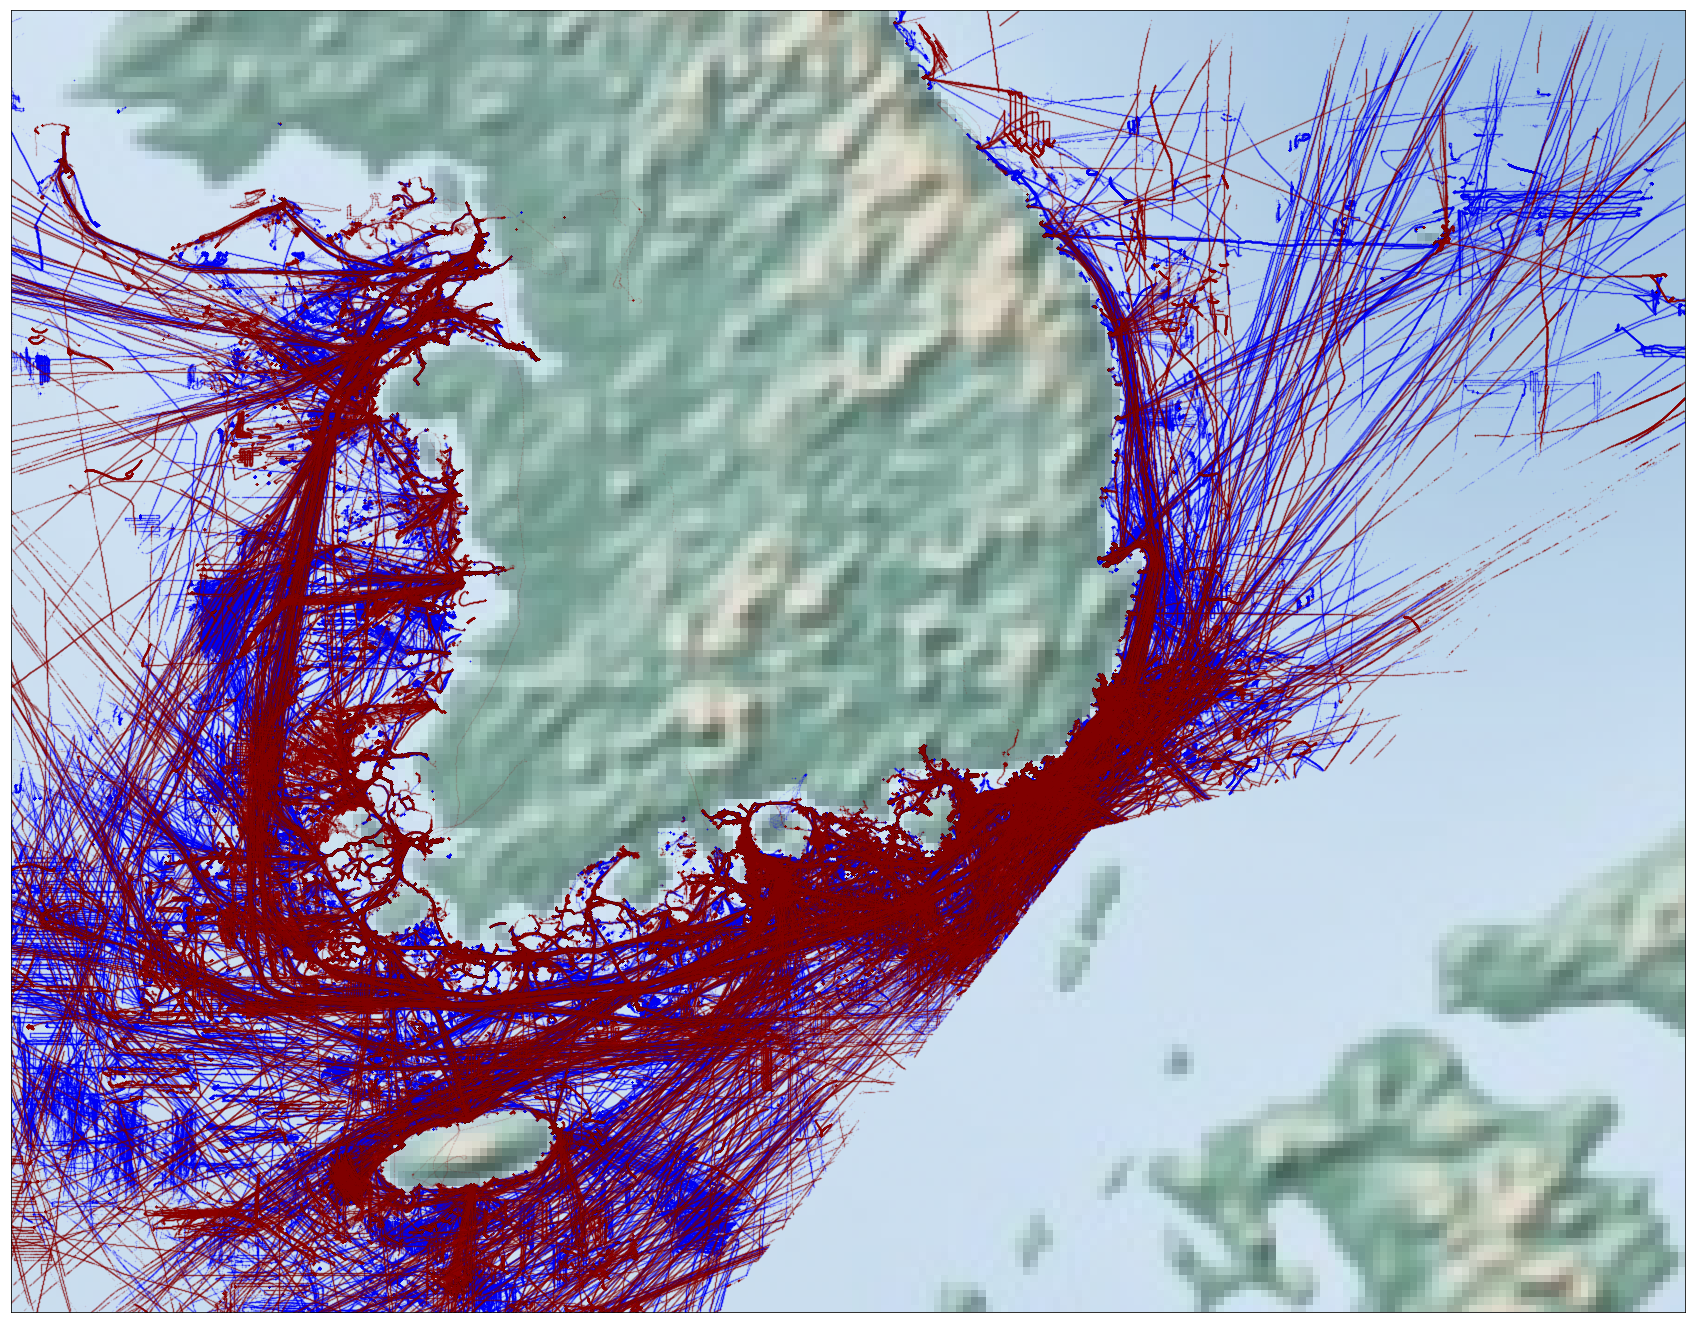

In [21]:
fig = plt.figure(figsize=(30,30))
#m = Basemap(llcrnrlon = 20,llcrnrlat = 63, urcrnrlon = 26,
#       urcrnrlat = summer.lat.max(),
#       resolution='l')
m = Basemap(llcrnrlon = summer.lon.min(),llcrnrlat = summer.lat.min(), urcrnrlon = summer.lon.max(),
       urcrnrlat = summer.lat.max(),
       resolution='l')

m.shadedrelief()

xy = winter.loc[winter.lat > 0].loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='blue', alpha=0.1, markersize=0.5)

xy = summer.loc[summer.lat > 0].loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='darkred', alpha=0.1, markersize=0.5)

plt.show()